In [1]:
var openDigger = require('../src/open_digger');
var year = 2023, startMonth = 1, endMonth = 12, startYear = 2018
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var baseOptions = {
    startYear, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

## 基金会洞察

### 全球基金会旗下项目OpenRank Top 10

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: ['Foundation'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬────────────┬──────────┬────────────────────────────────┬─────────────┐
│ (index) │     id     │ platform │              name              │  openrank   │
├─────────┼────────────┼──────────┼────────────────────────────────┼─────────────┤
│    0    │ '99919302' │ 'GitHub' │         'apache/doris'         │ [ 4307.26 ] │
│    1    │ '33884891' │ 'GitHub' │        'apache/airflow'        │ [ 3642.9 ]  │
│    2    │ '10919030' │ 'Gitee'  │       'openharmony/docs'       │ [ 3277.69 ] │
│    3    │ '16184957' │ 'Gitee'  │ 'openharmony/arkui_ace_engine' │ [ 2818.09 ] │
│    4    │ '27193779' │ 'GitHub' │         'nodejs/node'          │ [ 2736.37 ] │
│    5    │ '17165658' │ 'GitHub' │         'apache/spark'         │ [ 2654.02 ] │
│    6    │ '51905353' │ 'GitHub' │         'apache/arrow'         │ [ 2219.95 ] │
│    7    │ '50904245' │ 'GitHub' │         'apache/beam'          │ [ 2188.52 ] │
│    8    │ '76474200' │ 'GitHub' │         'apache/hudi'          │ [ 2124.67 ] │
│   

In [3]:
var processFoundationFieldData = (label, title) => {
    var years = [2018, 2019, 2020, 2021, 2022, 2023];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: label, limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2018-2023`});
    });
};

### 全球基金会旗下项目OpenRank Top 10 变化趋势

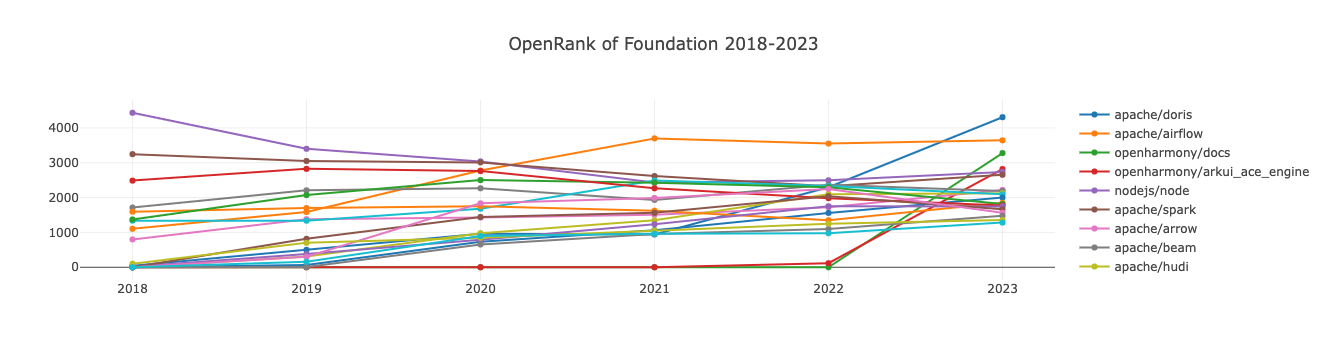

In [4]:
processFoundationFieldData(['Foundation'], 'Foundation');

### 各基金会 OpenRank 变化趋势

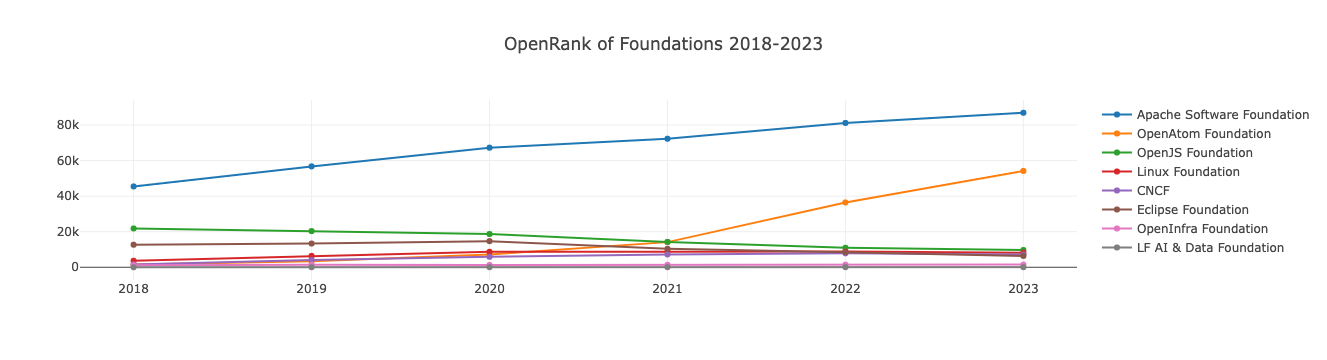

In [5]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations'],
    startYear: 2018, endYear: 2023, endMonth: 12,
    groupBy: 'Foundation',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':foundations'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Foundations 2018-2023`, xaxis: { type: 'category' }});
})

### 中国基金会旗下项目OpenRank Top 10

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Foundation'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │               name               │  openrank   │
├─────────┼─────────────┼──────────┼──────────────────────────────────┼─────────────┤
│    0    │ '99919302'  │ 'GitHub' │          'apache/doris'          │ [ 4307.26 ] │
│    1    │ '10919030'  │ 'Gitee'  │        'openharmony/docs'        │ [ 3277.69 ] │
│    2    │ '16184957'  │ 'Gitee'  │  'openharmony/arkui_ace_engine'  │ [ 2818.09 ] │
│    3    │ '208728772' │ 'GitHub' │        'milvus-io/milvus'        │ [ 2001.11 ] │
│    4    │ '20587599'  │ 'GitHub' │          'apache/flink'          │ [ 1816.72 ] │
│    5    │ '49876476'  │ 'GitHub' │     'apache/shardingsphere'      │ [ 1662.8 ]  │
│    6    │ '212382406' │ 'GitHub' │          'apache/ozone'          │ [ 1281.57 ] │
│    7    │ '158975124' │ 'GitHub' │          'apache/iotdb'          │ [ 1265.72 ] │
│    8    │ '16184969'  │ 'Gitee'  │ 'openharmony/grap

### 中国基金会旗下项目OpenRank Top 10 变化趋势

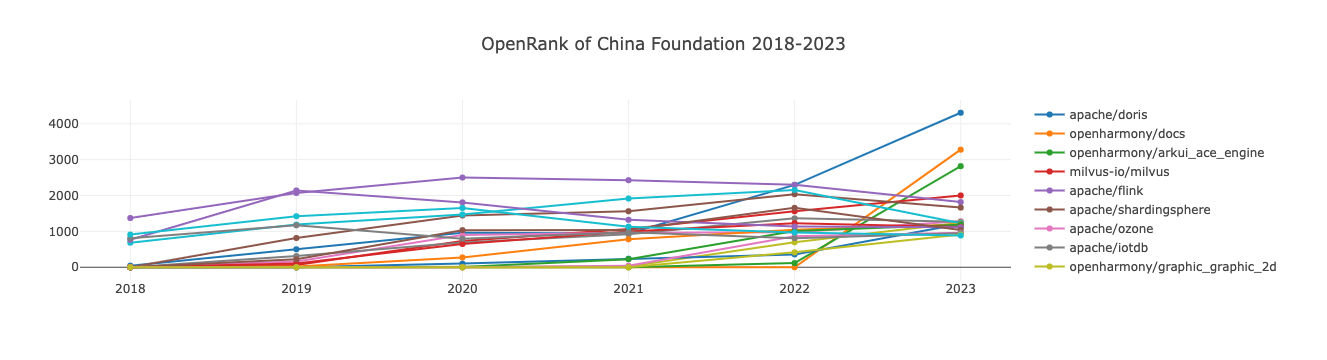

In [7]:
processFoundationFieldData([':regions/CN', 'Foundation'], 'China Foundation');

## 各基金会旗下项目OpenRank TOP 10 榜单

### CNCF

In [8]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/linux_foundation/cncf'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────────────┬────────────┐
│ (index) │     id      │ platform │           name            │  openrank  │
├─────────┼─────────────┼──────────┼───────────────────────────┼────────────┤
│    0    │ '50613991'  │ 'GitHub' │     'goharbor/harbor'     │ [ 885.04 ] │
│    1    │ '311639195' │ 'GitHub' │   'karmada-io/karmada'    │ [ 764.61 ] │
│    2    │ '135516270' │ 'GitHub' │       'k3s-io/k3s'        │ [ 708.3 ]  │
│    3    │ '48833910'  │ 'GitHub' │        'tikv/tikv'        │ [ 571.98 ] │
│    4    │ '278954673' │ 'GitHub' │ 'fluid-cloudnative/fluid' │ [ 481.83 ] │
│    5    │ '175592968' │ 'GitHub' │   'volcano-sh/volcano'    │ [ 442.74 ] │
│    6    │ '150713223' │ 'GitHub' │    'kubeedge/kubeedge'    │ [ 427.09 ] │
│    7    │ '224908244' │ 'GitHub' │    'WasmEdge/WasmEdge'    │ [ 419.79 ] │
│    8    │ '265800635' │ 'GitHub' │   'openyurtio/openyurt'   │ [ 395.31 ] │
│    9    │ '171396748' │ 'GitHub' │      'cubefs/cubefs'      │

### lfai

In [9]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/linux_foundation/lfai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────────────┬───────────┐
│ (index) │     id      │ platform │           name            │ openrank  │
├─────────┼─────────────┼──────────┼───────────────────────────┼───────────┤
│    0    │ '159112371' │ 'GitHub' │   'lfai/lfai-landscape'   │ [ 25.68 ] │
│    1    │ '261557750' │ 'GitHub' │     'lfai/foundation'     │ [ 17.53 ] │
│    2    │ '160428715' │ 'GitHub' │ 'lfai/proposing-projects' │ [ 15.15 ] │
└─────────┴─────────────┴──────────┴───────────────────────────┴───────────┘


### OpenAtom

In [10]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openatom'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                 name                  │  openrank   │
├─────────┼─────────────┼──────────┼───────────────────────────────────────┼─────────────┤
│    0    │ '10919030'  │ 'Gitee'  │          'openharmony/docs'           │ [ 3277.69 ] │
│    1    │ '16184957'  │ 'Gitee'  │    'openharmony/arkui_ace_engine'     │ [ 2818.09 ] │
│    2    │ '16184969'  │ 'Gitee'  │   'openharmony/graphic_graphic_2d'    │ [ 1239.6 ]  │
│    3    │  '6634686'  │ 'Gitee'  │           'openeuler/docs'            │ [ 1206.9 ]  │
│    4    │ '11218621'  │ 'Gitee'  │        'openharmony/xts_acts'         │ [ 1186.06 ] │
│    5    │ '128624453' │ 'GitHub' │             'NervJS/taro'             │ [ 1112.71 ] │
│    6    │ '17812931'  │ 'Gitee'  │ 'openharmony/arkcompiler_ets_runtime' │ [ 961.99 ]  │
│    7    │ '16184977'  │ 'Gitee'  │    'openharmony/interface_sdk-js'     │ [ 910.91 ]  │

### Apache

In [11]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/apache'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────┬─────────────┐
│ (index) │     id      │ platform │       name        │  openrank   │
├─────────┼─────────────┼──────────┼───────────────────┼─────────────┤
│    0    │ '99919302'  │ 'GitHub' │  'apache/doris'   │ [ 4307.26 ] │
│    1    │ '33884891'  │ 'GitHub' │ 'apache/airflow'  │ [ 3642.9 ]  │
│    2    │ '17165658'  │ 'GitHub' │  'apache/spark'   │ [ 2654.02 ] │
│    3    │ '51905353'  │ 'GitHub' │  'apache/arrow'   │ [ 2219.95 ] │
│    4    │ '50904245'  │ 'GitHub' │   'apache/beam'   │ [ 2188.52 ] │
│    5    │ '76474200'  │ 'GitHub' │   'apache/hudi'   │ [ 2124.67 ] │
│    6    │ '39464018'  │ 'GitHub' │ 'apache/superset' │ [ 2092.32 ] │
│    7    │  '2211243'  │ 'GitHub' │  'apache/kafka'   │ [ 1849.97 ] │
│    8    │ '20587599'  │ 'GitHub' │  'apache/flink'   │ [ 1816.72 ] │
│    9    │ '158256479' │ 'GitHub' │ 'apache/iceberg'  │ [ 1747.12 ] │
└─────────┴─────────────┴──────────┴───────────────────┴─────────────┘


### Eclipse

In [12]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/eclipse'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────┬────────────┐
│ (index) │     id      │ platform │           name           │  openrank  │
├─────────┼─────────────┼──────────┼──────────────────────────┼────────────┤
│    0    │ '108592307' │ 'GitHub' │      'eclipse/sumo'      │ [ 482.79 ] │
│    1    │  '2045207'  │ 'GitHub' │ 'eclipse/jetty.project'  │ [ 394.61 ] │
│    2    │ '53077478'  │ 'GitHub' │      'eclipse/omr'       │ [ 276.75 ] │
│    3    │ '15237269'  │ 'GitHub' │      'eclipse/kura'      │ [ 276.2 ]  │
│    4    │ '32935745'  │ 'GitHub' │      'eclipse/che'       │ [ 256.25 ] │
│    5    │  '1553758'  │ 'GitHub' │     'eclipse/xtext'      │ [ 179.33 ] │
│    6    │ '45860898'  │ 'GitHub' │    'eclipse/hawkbit'     │ [ 178.6 ]  │
│    7    │ '259645903' │ 'GitHub' │  'eclipse/kiso-testing'  │ [ 164.86 ] │
│    8    │ '53614190'  │ 'GitHub' │   'eclipse/mosquitto'    │ [ 164.32 ] │
│    9    │ '62056780'  │ 'GitHub' │ 'eclipse/eclipse.jdt.ls' │ [ 154.84 ] │

### OpenInfra

In [13]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openinfra'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                  name                   │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────────────────────┼─────────────┤
│    0    │ '113404957' │ 'GitHub' │    'kata-containers/kata-containers'    │ [ 1192.65 ] │
│    1    │ '110539912' │ 'GitHub' │         'kata-containers/tests'         │ [ 160.55 ]  │
│    2    │ '113113705' │ 'GitHub' │       'kata-containers/community'       │  [ 22.22 ]  │
│    3    │ '293399774' │ 'GitHub' │      'kata-containers/cgroups-rs'       │  [ 19.34 ]  │
│    4    │ '119962177' │ 'GitHub' │          'kata-containers/ci'           │  [ 11.56 ]  │
│    5    │  '6929734'  │ 'GitHub' │           'openstack/cinder'            │  [ 9.06 ]   │
│    6    │ '459823742' │ 'GitHub' │       'openstack/skyline-console'       │  [ 8.82 ]   │
│    7    │ '112949842' │ 'GitHub' │ 'kata-containers/www.katacontaine

### OpenJs

In [14]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openjs'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬────────────┬──────────┬───────────────────────────┬─────────────┐
│ (index) │     id     │ platform │           name            │  openrank   │
├─────────┼────────────┼──────────┼───────────────────────────┼─────────────┤
│    0    │ '27193779' │ 'GitHub' │       'nodejs/node'       │ [ 2736.37 ] │
│    1    │ '9384267'  │ 'GitHub' │    'electron/electron'    │ [ 1773.31 ] │
│    2    │ '15062869' │ 'GitHub' │      'facebook/jest'      │ [ 626.51 ]  │
│    3    │ '2296970'  │ 'GitHub' │ 'webdriverio/webdriverio' │ [ 617.95 ]  │
│    4    │ '11061773' │ 'GitHub' │      'eslint/eslint'      │ [ 541.68 ]  │
│    5    │ '7530570'  │ 'GitHub' │      'appium/appium'      │  [ 437.7 ]  │
│    6    │ '3678731'  │ 'GitHub' │     'webpack/webpack'     │ [ 362.75 ]  │
│    7    │ '69495170' │ 'GitHub' │     'fastify/fastify'     │ [ 354.14 ]  │
│    8    │ '41766002' │ 'GitHub' │   'ampproject/amphtml'    │ [ 342.96 ]  │
│    9    │ '48030204' │ 'GitHub' │      'visgl/deck.gl'      │ 

## 近5年各基金会旗下项目OpenRank变化趋势

In [15]:
var processTechFieldData = (label, title) => {
    var years = [2018, 2019, 2020, 2021, 2022, 2023];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2018-2023`});
    });
};

### CNCF

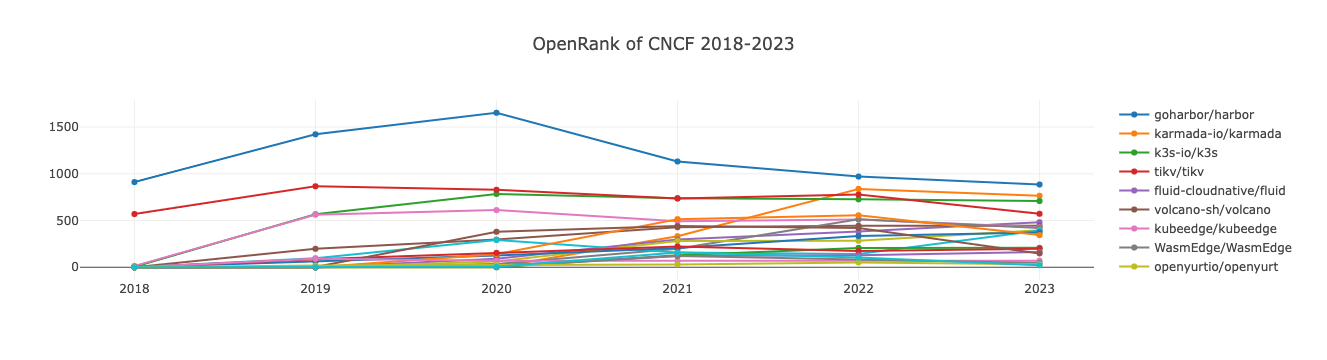

In [16]:
processTechFieldData(':foundations/linux_foundation/cncf', 'CNCF');

### lfai

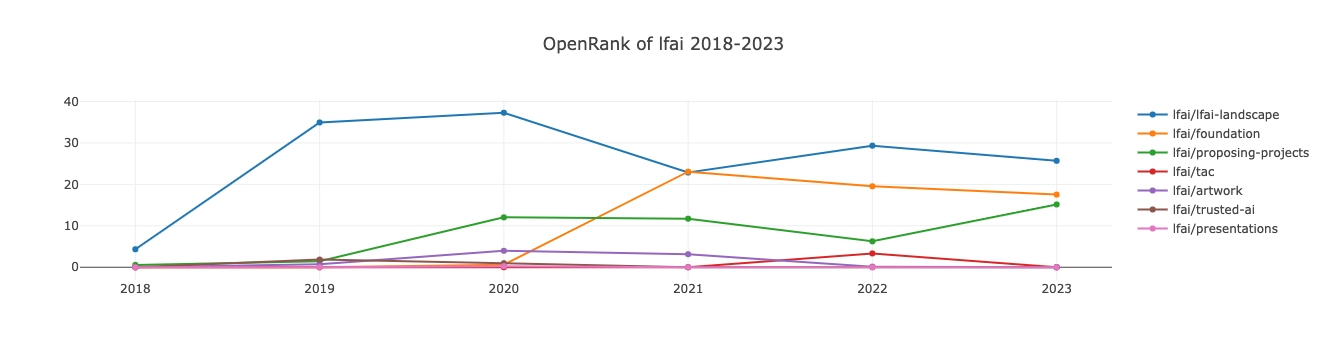

In [17]:
processTechFieldData(':foundations/linux_foundation/lfai', 'lfai');

### OpenAtom

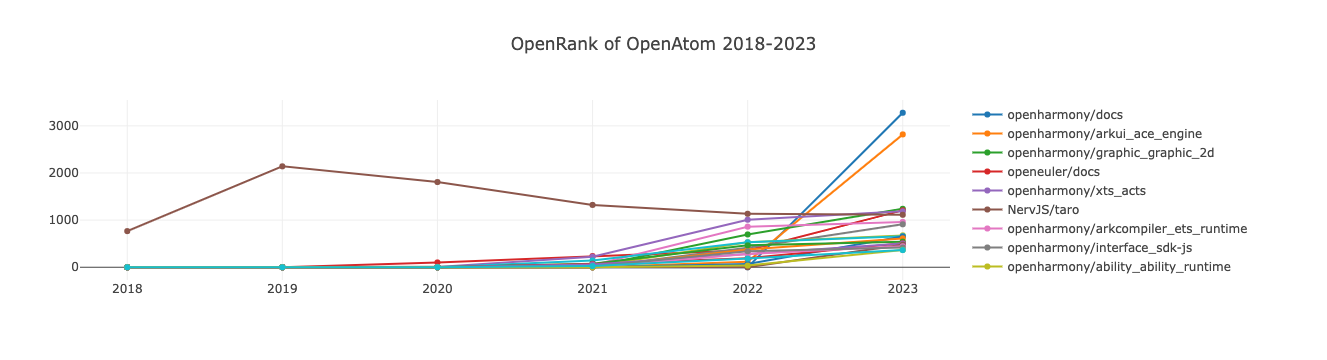

In [18]:
processTechFieldData(':foundations/openatom', 'OpenAtom');

### Apache

In [ ]:
processTechFieldData(':foundations/apache', 'Apache');

### Eclipse

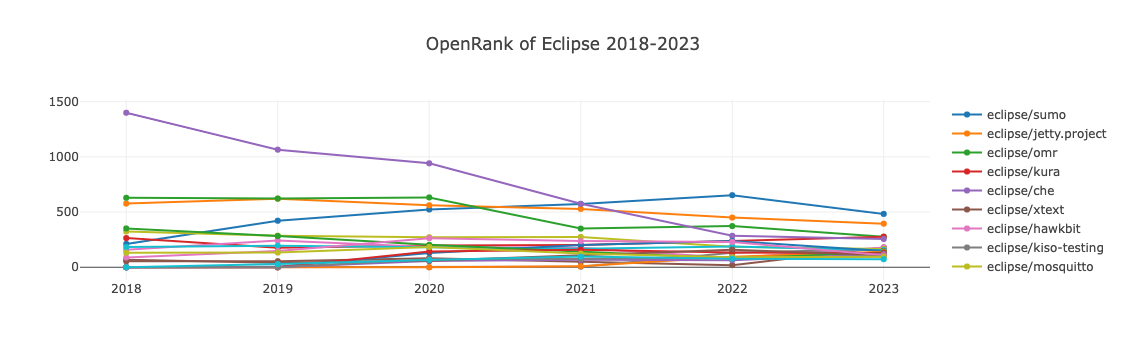

In [20]:
processTechFieldData(':foundations/eclipse', 'Eclipse');

### OpenInfra

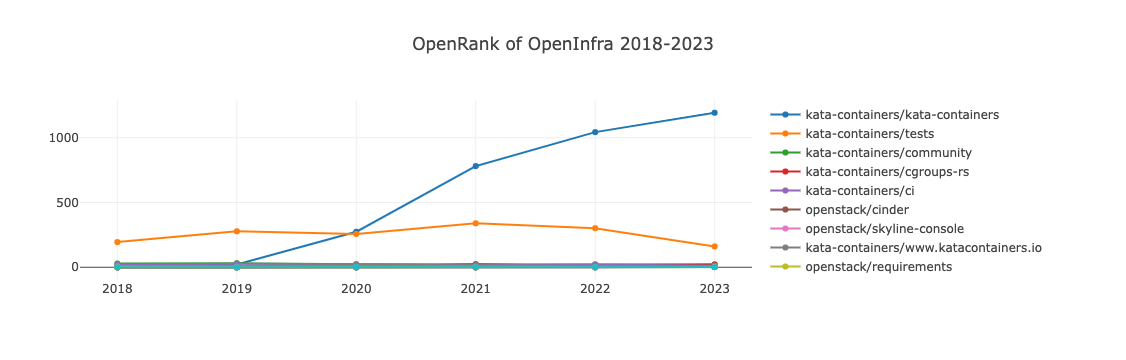

In [21]:
processTechFieldData(':foundations/openinfra', 'OpenInfra');

### OpenJs

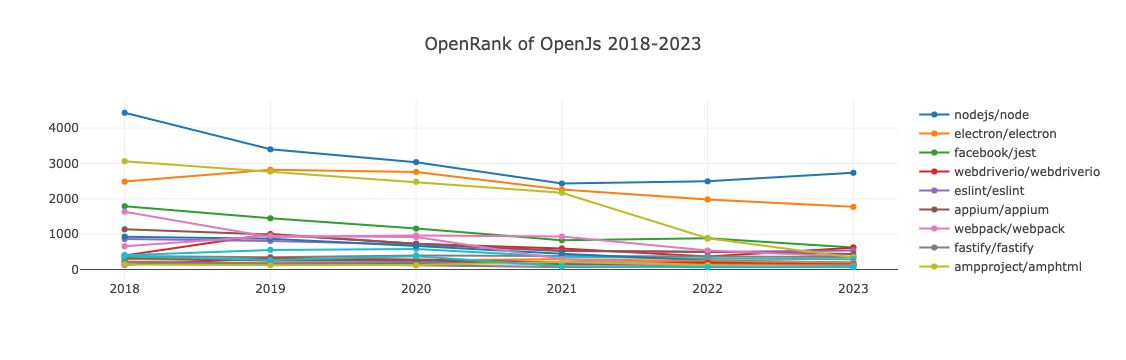

In [22]:
processTechFieldData(':foundations/openjs', 'OpenJs');